In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Data load

In [ ]:
data_df = pd.read_csv("../data/final_result.csv")
data_df.columns

Index(['scenario', 'method', 'num_species', 'replica', 'num_gt',
       'alignment_length', 'indel_rate', 'error_rate', 'max_reticulation',
       'mafft', 'iqtree', 'num_real_reticulations',
       'num_inferred_reticulations', 'distance_RF', 'distance_luay',
       'distance_rnbs', 'distance_normwapd', 'percentage',
       'ground_truth_network_likelihood', 'log_probability', 'time_infer_net',
       'iqtree_time', 'mafft_time', 'norm_avg_dis_truth_vs_mafft_false',
       'norm_avg_dis_truth_vs_mafft_true',
       'norm_avg_dis_mafft_true_vs_mafft_false', 'mafft_avg_sp_scores',
       'mafft_avg_tc_scores', 'mismatches',
       'bootstrap_true_vs_original_refinement',
       'bootstrap_true_vs_estimated_refinement', 'kl_true_vs_original',
       'kl_true_vs_estimated', 'l1_true_vs_original', 'l1_true_vs_estimated',
       'estimated_network', 'target_network', 'likelihoods'],
      dtype='object')

In [3]:
data_df.scenario.unique()

array(['s4_2_ret_cross', 's1_1_ret_down', 's0_0_ret'], dtype=object)

In [5]:
data_df.method.unique()

array(['InferNetwork_MPL', 'MCMC_GT_pseudo', 'InferNetwork_ML'],
      dtype=object)

In [6]:
data_df[(data_df.replica==0)&(data_df.scenario=="s1_1_ret_down")&(~(data_df.mafft_avg_sp_scores.isna()))]

,scenario,method,num_species,replica,num_gt,alignment_length,indel_rate,error_rate,max_reticulation,mafft,...,mismatches,bootstrap_true_vs_original_refinement,bootstrap_true_vs_estimated_refinement,kl_true_vs_original,kl_true_vs_estimated,l1_true_vs_original,l1_true_vs_estimated,estimated_network,target_network,likelihoods
20525,s1_1_ret_down,InferNetwork_MPL,6,0,100,200,0.00,0.00,0,True,...,121.68,NaN,0.880,NaN,1.051317,NaN,1.040,"(OUT:1.0,(C:1.0,((A:1.0,B:1.0):0.7243157797159...","(((A:2,(B:0.9)X1#H1:1.1::0.7)T1:4,((D:3,(E:2,X...","[-847.8195771901223, -910.0409252121605, -919...."
20527,s1_1_ret_down,InferNetwork_MPL,6,0,100,200,0.05,0.00,0,True,...,259.76,NaN,0.820,NaN,0.986449,NaN,1.000,"(OUT:1.0,((A:1.0,B:1.0):0.6961704456208201,(C:...","(((A:2,(B:0.9)X1#H1:1.1::0.7)T1:4,((D:3,(E:2,X...","[-958.8517847978914, -959.9425627151724, -963...."
20529,s1_1_ret_down,InferNetwork_MPL,6,0,100,200,0.10,0.00,0,True,...,407.72,NaN,0.800,NaN,1.024993,NaN,0.980,"(((C:1.0,(E:1.0,D:1.0):0.5795749672527674):0.0...","(((A:2,(B:0.9)X1#H1:1.1::0.7)T1:4,((D:3,(E:2,X...","[-958.7024680484591, -959.0641601443848, -962...."
20531,s1_1_ret_down,InferNetwork_MPL,6,0,100,200,0.00,0.01,0,True,...,NaN,NaN,0.900,NaN,1.110723,NaN,0.940,"(OUT:1.0,(C:1.0,((B:1.0,A:1.0):0.7739008686104...","(((A:2,(B:0.9)X1#H1:1.1::0.7)T1:4,((D:3,(E:2,X...","[-869.6024727804291, -894.8783898211057, -895...."
20533,s1_1_ret_down,InferNetwork_MPL,6,0,100,200,0.05,0.01,0,True,...,NaN,NaN,0.830,NaN,1.170682,NaN,1.040,"(OUT:1.0,((C:1.0,(E:1.0,D:1.0):0.6651529614919...","(((A:2,(B:0.9)X1#H1:1.1::0.7)T1:4,((D:3,(E:2,X...","[-956.9544193245746, -962.4172541585853, -971...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22563,s1_1_ret_down,InferNetwork_ML,6,0,500,1000,0.05,0.01,3,True,...,NaN,NaN,0.920,NaN,0.080271,NaN,0.252,"(OUT:0.5368839599939598,((A:2.745777052571107,...","(((A:2,(B:0.9)X1#H1:1.1::0.7)T1:4,((D:3,(E:2,X...",[-1207.4104211183426];[-1192.3124720632343];[-...
22565,s1_1_ret_down,InferNetwork_ML,6,0,500,1000,0.10,0.01,3,True,...,NaN,NaN,0.890,NaN,0.145791,NaN,0.388,"(OUT:2.8802044737804176,((((C:1.76550573525476...","(((A:2,(B:0.9)X1#H1:1.1::0.7)T1:4,((D:3,(E:2,X...",[-1308.6990233189301];[-1282.4049523273338];[-...
22567,s1_1_ret_down,InferNetwork_ML,6,0,500,1000,0.00,0.10,3,True,...,NaN,NaN,0.980,NaN,0.062646,NaN,0.176,"(OUT:0.11529625057089463,((C:3.593706745516824...","(((A:2,(B:0.9)X1#H1:1.1::0.7)T1:4,((D:3,(E:2,X...",[-1127.7290004407012];[-1127.7290004407012];[-...
22569,s1_1_ret_down,InferNetwork_ML,6,0,500,1000,0.05,0.10,3,True,...,NaN,NaN,0.902,NaN,0.170686,NaN,0.440,"(OUT:1.086237270246357,(((A:0.2308079903779290...","(((A:2,(B:0.9)X1#H1:1.1::0.7)T1:4,((D:3,(E:2,X...",[-1354.7649463248356];[-1348.4951748801438];[-...


# Characteristics of the data

## SP scores for inferred alignments

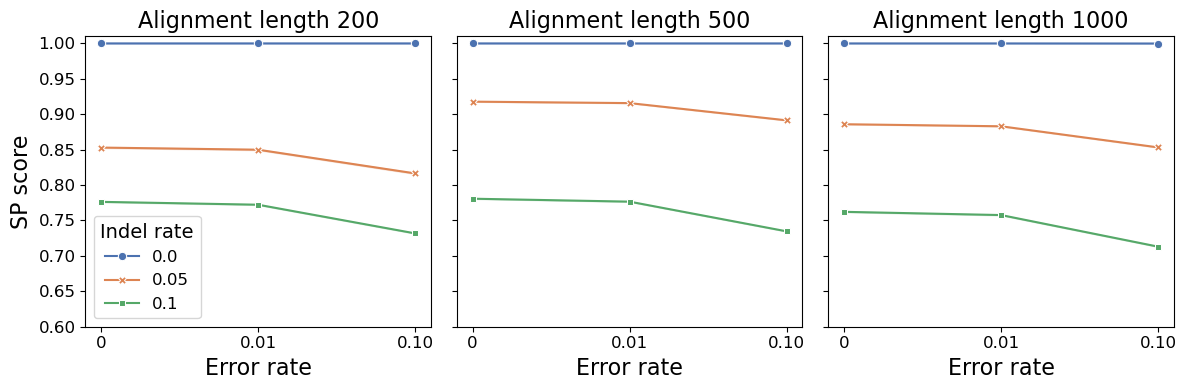

In [107]:
_plot_df = data_df[~(data_df.mafft_avg_sp_scores.isna())]\
            .drop_duplicates(subset=["replica", "scenario", "alignment_length", "num_gt",
                                     "indel_rate", "error_rate", "mafft_avg_sp_scores"])[["replica", "scenario", "alignment_length", "num_gt",
                                                           "indel_rate", "error_rate", "mafft_avg_sp_scores"]].copy()
_plot_df["SP_score"] = _plot_df["mafft_avg_sp_scores"] * _plot_df["num_gt"]
_plot_df = _plot_df.groupby(["replica", "alignment_length", "indel_rate", "error_rate"]).sum()
_plot_df["SP_score"] = _plot_df["SP_score"] / _plot_df["num_gt"]
_plot_df = _plot_df["SP_score"].reset_index()
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

sns.lineplot(data=_plot_df[_plot_df.alignment_length==200], 
            x="error_rate", y="SP_score", style="indel_rate", hue="indel_rate",
            # errorbar=("pi", 100), err_style="bars",
            markers=True, dashes=False, palette="deep",
            ax=axs[0])
sns.lineplot(data=_plot_df[_plot_df.alignment_length==500], 
            x="error_rate", y="SP_score", style="indel_rate", hue="indel_rate",
            # errorbar=("pi", 100), err_style="bars",
            markers=True, dashes=False, palette="deep",
            ax=axs[1], legend=False)
sns.lineplot(data=_plot_df[_plot_df.alignment_length==1000], 
             x="error_rate", y="SP_score", style="indel_rate", hue="indel_rate", 
            # errorbar=("pi", 100), err_style="bars",
             markers=True, dashes=False, palette="deep",
             ax=axs[2], legend=False)

axs[0].set_title("Alignment length 200", fontsize=16)
axs[1].set_title("Alignment length 500", fontsize=16)
axs[2].set_title("Alignment length 1000", fontsize=16)

axs[0].set_ylabel("SP score", fontsize=16)
axs[0].set_xlabel("Error rate", fontsize=16)
axs[1].set_xlabel("Error rate", fontsize=16)
axs[2].set_xlabel("Error rate", fontsize=16)

axs[0].set_yticks(np.arange(0.6, 1.01, 0.05))
axs[0].set_yticklabels([f"{i:0.2f}" for i in np.arange(0.6, 1.01, 0.05)], fontsize=12)

axs[0].set_xticks([0, 1, 2])
axs[0].set_xticklabels(["0", "0.01", "0.10"], fontsize=12)
axs[1].set_xticks([0, 1, 2])
axs[1].set_xticklabels(["0", "0.01", "0.10"], fontsize=12)
axs[2].set_xticks([0, 1, 2])
axs[2].set_xticklabels(["0", "0.01", "0.10"], fontsize=12)

axs[0].legend(title="Indel rate", fontsize=12, title_fontsize=14, loc="lower left")

plt.ylim((0.6, 1.01))

plt.tight_layout()
plt.savefig("../plots/aln_SP_scores-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

In [108]:
(np.asarray(_plot_df[(_plot_df.error_rate=="0.0")&(_plot_df.indel_rate==0.)]["SP_score"]) - \
    np.asarray(_plot_df[(_plot_df.error_rate=="0.0")&(_plot_df.indel_rate==0.05)]["SP_score"])).mean()

0.11444614537680306

In [109]:
(np.asarray(_plot_df[(_plot_df.error_rate=="0.0")&(_plot_df.indel_rate==0.)]["SP_score"]) - \
    np.asarray(_plot_df[(_plot_df.error_rate=="0.0")&(_plot_df.indel_rate==0.1)]["SP_score"])).mean()

0.22689716171458235

In [110]:
(np.asarray(_plot_df[(_plot_df.error_rate=="0.0")&(_plot_df.indel_rate==0.1)]["SP_score"]) - \
    np.asarray(_plot_df[(_plot_df.error_rate=="0.1")&(_plot_df.indel_rate==0.1)]["SP_score"])).mean()

0.04660701096369255

In [111]:
(_plot_df.groupby(["alignment_length", "error_rate", "indel_rate"]).std().reset_index()["SP_score"].mean(),
_plot_df.groupby(["alignment_length", "error_rate", "indel_rate"]).std().reset_index()["SP_score"].min(),
_plot_df.groupby(["alignment_length", "error_rate", "indel_rate"]).std().reset_index()["SP_score"].max())

(0.0004306646686048778, 0.0, 0.0011863023969194372)

## nRF distances for inferred gene trees

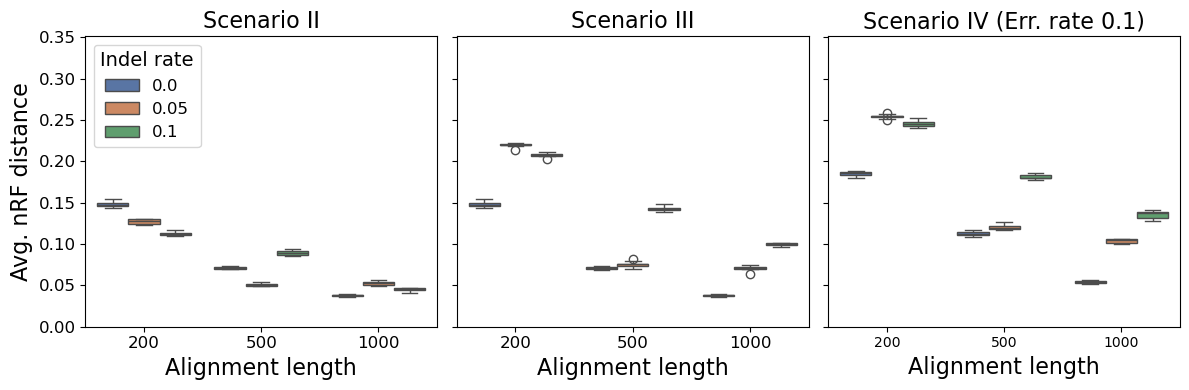

In [141]:
_plot_df = data_df[~(data_df.norm_avg_dis_truth_vs_mafft_true.isna())].drop_duplicates(
                        subset=["replica", "scenario", "alignment_length", "num_gt",
                                "indel_rate", "error_rate", "norm_avg_dis_truth_vs_mafft_false", "norm_avg_dis_truth_vs_mafft_true"]
                        )[["replica", "alignment_length", "num_gt",
                           "indel_rate", "error_rate", "norm_avg_dis_truth_vs_mafft_false", "norm_avg_dis_truth_vs_mafft_true"]].copy()
_plot_df["nRF_simul_aln"] = _plot_df["norm_avg_dis_truth_vs_mafft_false"] * _plot_df["num_gt"]
_plot_df["nRF_mafft_aln"] = _plot_df["norm_avg_dis_truth_vs_mafft_true"] * _plot_df["num_gt"]
_plot_df = _plot_df.groupby(["replica", "alignment_length", "indel_rate", "error_rate"]).sum()
_plot_df["nRF_simul_aln"] = _plot_df["nRF_simul_aln"] / _plot_df["num_gt"]
_plot_df["nRF_mafft_aln"] = _plot_df["nRF_mafft_aln"] / _plot_df["num_gt"]
_plot_df = _plot_df[["nRF_simul_aln", "nRF_mafft_aln"]].reset_index()
# _plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)

sns.boxplot(data=_plot_df[_plot_df.error_rate==0.], 
            x="alignment_length", y="nRF_simul_aln", hue="indel_rate", 
            palette="deep",
            ax=axs[0])
sns.boxplot(data=_plot_df[_plot_df.error_rate==0.], 
            x="alignment_length", y="nRF_mafft_aln", hue="indel_rate", 
            palette="deep",
            ax=axs[1], legend=False)
sns.boxplot(data=_plot_df[_plot_df.error_rate==0.1], 
            x="alignment_length", y="nRF_mafft_aln", hue="indel_rate", 
            palette="deep", 
            ax=axs[2], legend=False)

axs[0].set_title("Scenario II", fontsize=16)
axs[1].set_title("Scenario III", fontsize=16)
axs[2].set_title("Scenario IV (Err. rate 0.1)", fontsize=16)

axs[0].set_ylabel("Avg. nRF distance", fontsize=16)
axs[0].set_xlabel("Alignment length", fontsize=16)
axs[1].set_xlabel("Alignment length", fontsize=16)
axs[2].set_xlabel("Alignment length", fontsize=16)

axs[0].set_yticks(np.arange(0., .351, 0.05))
axs[0].set_yticklabels([f"{i:0.2f}" for i in np.arange(0., .351, 0.05)], fontsize=12)

axs[0].set_xticks([0, 1, 2])
axs[0].set_xticklabels(["200", "500", "1000"], fontsize=12)
axs[1].set_xticks([0, 1, 2])
axs[1].set_xticklabels(["200", "500", "1000"], fontsize=12)

axs[0].legend(title="Indel rate", fontsize=12, title_fontsize=14, loc="upper left")

plt.ylim((0.0, .351))

plt.tight_layout()
plt.savefig("../plots/nRF_distances-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

# Inference results

## Likelihood trajectories

In [8]:
def get_scenario(uses_mafft, uses_iqtree, has_error, error_rate):
    if not uses_mafft and not uses_iqtree and not has_error:
        return "I"
    elif not uses_mafft and uses_iqtree and not has_error:
        return "II"
    elif uses_mafft and uses_iqtree and not has_error:
        return "III"
    elif uses_mafft and uses_iqtree and has_error:
        if error_rate == "0.01":
            return "IV (0.01)"
        elif error_rate == "0.1":
            return "IV (0.10)"
        else:
            return np.nan
    else:
        return np.nan

### Individual plots

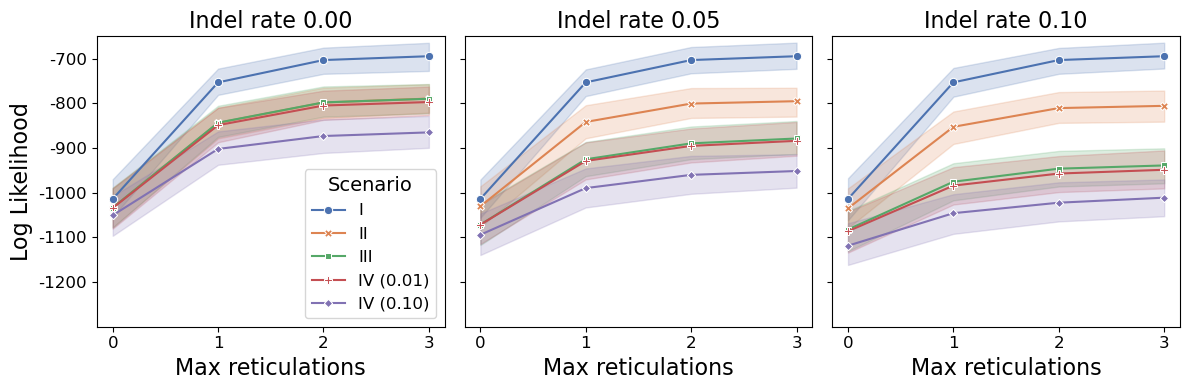

In [74]:
base_net = "s4_2_ret_cross"
method = "InferNetwork_ML"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
_plot_df["log_likelihood"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[").max())
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])
_plot_df

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[i], legend=plot_legend)
        
axs[0].set_ylabel("Log Likelihood", fontsize=16)
axs[0].set_ylim((-1300, -650))
axs[0].set_yticks(np.arange(-1200, -649, 100))
axs[0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-1200, -649, 100)], fontsize=12)

axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0].set_xlabel("Max reticulations", fontsize=16)
axs[1].set_xlabel("Max reticulations", fontsize=16)
axs[2].set_xlabel("Max reticulations", fontsize=16)

axs[0].set_title("Indel rate 0.00", fontsize=16)
axs[1].set_title("Indel rate 0.05", fontsize=16)
axs[2].set_title("Indel rate 0.10", fontsize=16)

axs[0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/likelihoods-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

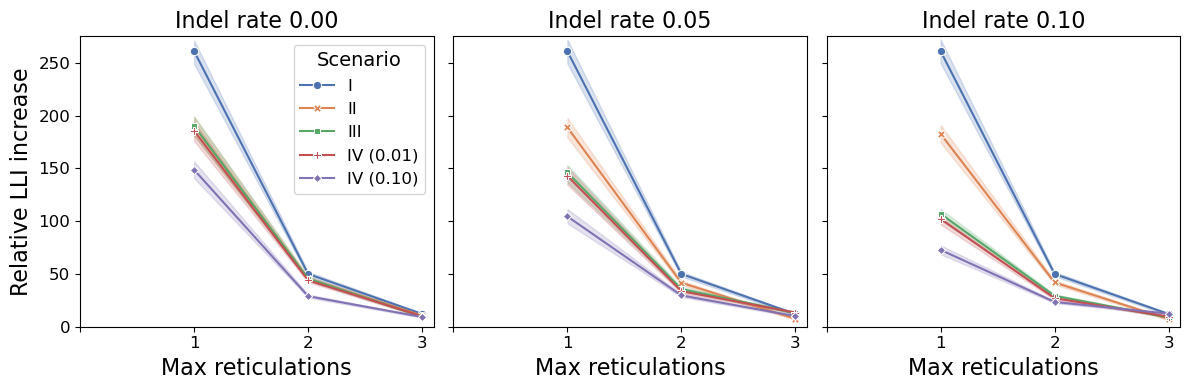

In [99]:
_plot_diff_df = _plot_df[["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation", "log_likelihood"]]\
    .groupby(["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation"]).sum().diff()\
    .where(lambda x: x>0).dropna().reset_index().copy()
_plot_diff_df = _plot_diff_df[_plot_diff_df.max_reticulation!="0"].copy()

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_diff_df[_plot_diff_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_diff_df[(_plot_diff_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[i], legend=plot_legend)
    
axs[0].set_ylabel("Relative LLI increase", fontsize=16)
axs[0].set_ylim((0, 275))
axs[0].set_yticks(np.arange(0, 275, 50))
axs[0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 275, 50)], fontsize=12)

axs[0].set_xticks([-1, 0, 1, 2])
axs[0].set_xticklabels(["", "1", "2", "3"], fontsize=12)
axs[1].set_xticks([-1, 0, 1, 2])
axs[1].set_xticklabels(["", "1", "2", "3"], fontsize=12)
axs[2].set_xticks([-1, 0, 1, 2])
axs[2].set_xticklabels(["", "1", "2", "3"], fontsize=12)

axs[0].set_xlabel("Max reticulations", fontsize=16)
axs[1].set_xlabel("Max reticulations", fontsize=16)
axs[2].set_xlabel("Max reticulations", fontsize=16)

axs[0].set_title("Indel rate 0.00", fontsize=16)
axs[1].set_title("Indel rate 0.05", fontsize=16)
axs[2].set_title("Indel rate 0.10", fontsize=16)

axs[0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="upper right")

plt.tight_layout()
plt.savefig("../plots/relative-lli-change-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

### Combined plots [2 reticulations]

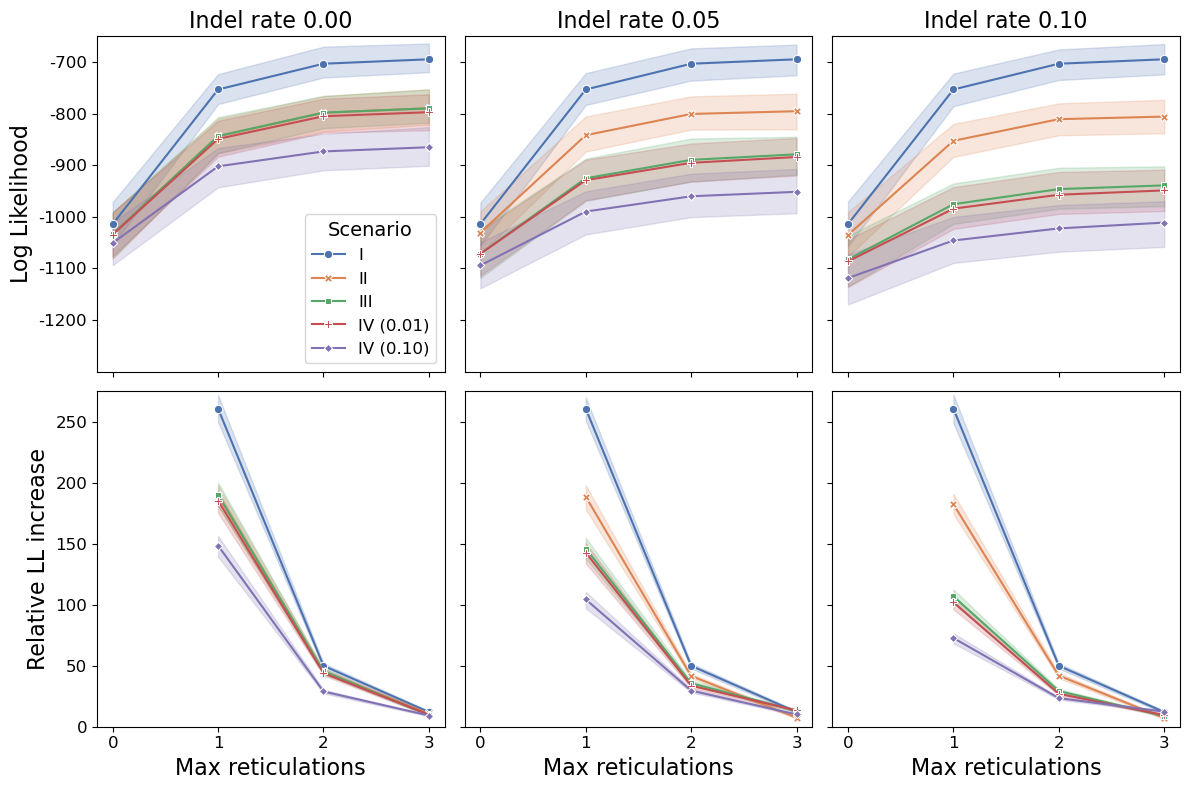

In [136]:
base_net = "s4_2_ret_cross"
method = "InferNetwork_ML"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
_plot_df["log_likelihood"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[").max())
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])
_plot_df

_plot_diff_df = _plot_df[["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation", "log_likelihood"]]\
    .groupby(["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation"]).sum().diff()\
    .where(lambda x: x>0).dropna().reset_index().copy()
_plot_diff_df = _plot_diff_df[_plot_diff_df.max_reticulation!="0"].copy()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[0][i], legend=plot_legend)
        
for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_diff_df[_plot_diff_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_diff_df[(_plot_diff_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[1][i], legend=False)

axs[0][0].set_ylabel("Log Likelihood", fontsize=16)
axs[0][0].set_ylim((-1300, -650))
axs[0][0].set_yticks(np.arange(-1200, -649, 100))
axs[0][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-1200, -649, 100)], fontsize=12)

axs[0][0].set_xticks([0, 1, 2, 3])
axs[0][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][1].set_xticks([0, 1, 2, 3])
axs[0][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][2].set_xticks([0, 1, 2, 3])
axs[0][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0][0].set_xlabel("Max reticulations", fontsize=16)
axs[0][1].set_xlabel("Max reticulations", fontsize=16)
axs[0][2].set_xlabel("Max reticulations", fontsize=16)

axs[0][0].set_title("Indel rate 0.00", fontsize=16)
axs[0][1].set_title("Indel rate 0.05", fontsize=16)
axs[0][2].set_title("Indel rate 0.10", fontsize=16)

axs[1][0].set_ylabel("Relative LL increase", fontsize=16)
axs[1][0].set_ylim((0, 275))
axs[1][0].set_yticks(np.arange(0, 275, 50))
axs[1][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 275, 50)], fontsize=12)

axs[1][0].set_xticks([0, 1, 2, 3])
axs[1][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][1].set_xticks([0, 1, 2, 3])
axs[1][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][2].set_xticks([0, 1, 2, 3])
axs[1][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[1][0].set_xlabel("Max reticulations", fontsize=16)
axs[1][1].set_xlabel("Max reticulations", fontsize=16)
axs[1][2].set_xlabel("Max reticulations", fontsize=16)

axs[1][0].set_title("", fontsize=16)
axs[1][1].set_title("", fontsize=16)
axs[1][2].set_title("", fontsize=16)

axs[0][0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/2ret-likelihoods-lli-change-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

### Combined plots [1 reticulation]

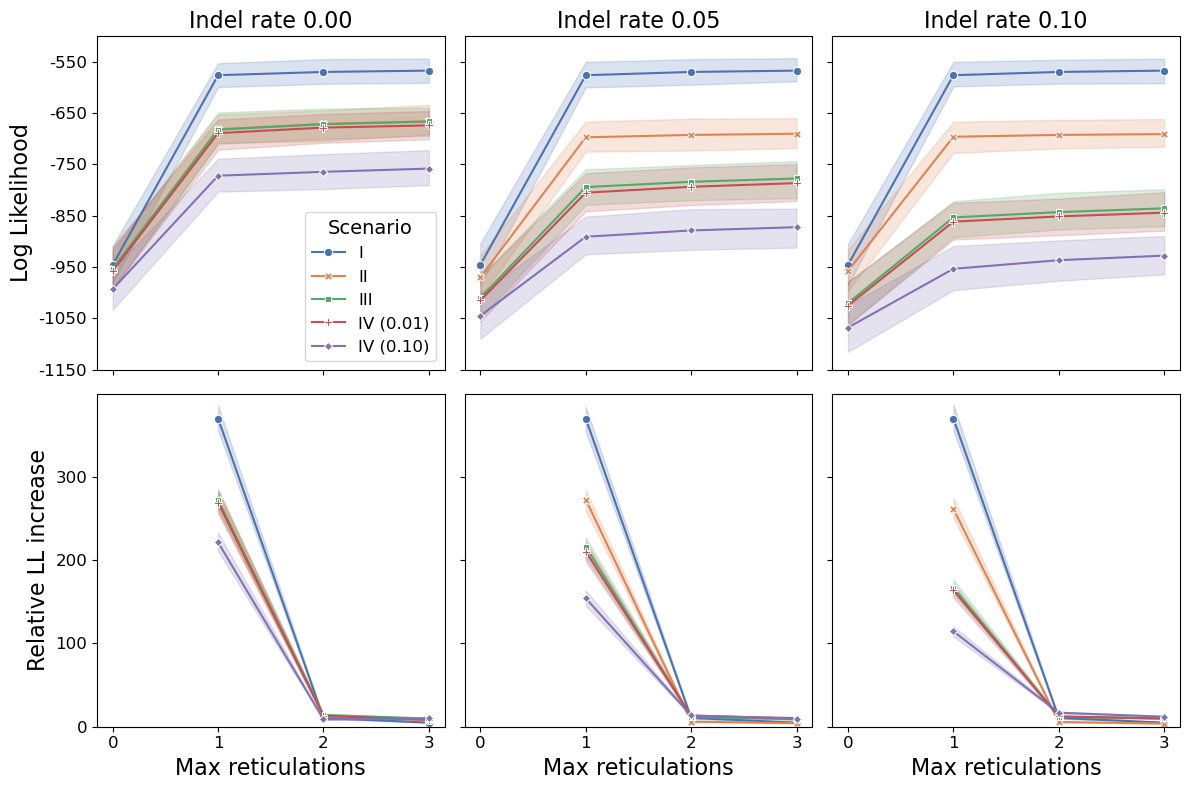

In [117]:
base_net = "s1_1_ret_down"
method = "InferNetwork_ML"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
_plot_df["log_likelihood"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[").max())
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])
_plot_df

_plot_diff_df = _plot_df[["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation", "log_likelihood"]]\
    .groupby(["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation"]).sum().diff()\
    .where(lambda x: x>0).dropna().reset_index().copy()
_plot_diff_df = _plot_diff_df[_plot_diff_df.max_reticulation!="0"].copy()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[0][i], legend=plot_legend)
        
for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_diff_df[_plot_diff_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_diff_df[(_plot_diff_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[1][i], legend=False)

axs[0][0].set_ylabel("Log Likelihood", fontsize=16)
axs[0][0].set_ylim((-1150, -500))
axs[0][0].set_yticks(np.arange(-1150, -500, 100))
axs[0][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-1150, -500, 100)], fontsize=12)

axs[0][0].set_xticks([0, 1, 2, 3])
axs[0][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][1].set_xticks([0, 1, 2, 3])
axs[0][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][2].set_xticks([0, 1, 2, 3])
axs[0][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0][0].set_xlabel("Max reticulations", fontsize=16)
axs[0][1].set_xlabel("Max reticulations", fontsize=16)
axs[0][2].set_xlabel("Max reticulations", fontsize=16)

axs[0][0].set_title("Indel rate 0.00", fontsize=16)
axs[0][1].set_title("Indel rate 0.05", fontsize=16)
axs[0][2].set_title("Indel rate 0.10", fontsize=16)

axs[1][0].set_ylabel("Relative LL increase", fontsize=16)
axs[1][0].set_ylim((0, 400))
axs[1][0].set_yticks(np.arange(0, 400, 100))
axs[1][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 400, 100)], fontsize=12)

axs[1][0].set_xticks([0, 1, 2, 3])
axs[1][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][1].set_xticks([0, 1, 2, 3])
axs[1][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][2].set_xticks([0, 1, 2, 3])
axs[1][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[1][0].set_xlabel("Max reticulations", fontsize=16)
axs[1][1].set_xlabel("Max reticulations", fontsize=16)
axs[1][2].set_xlabel("Max reticulations", fontsize=16)

axs[1][0].set_title("", fontsize=16)
axs[1][1].set_title("", fontsize=16)
axs[1][2].set_title("", fontsize=16)

axs[0][0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/1ret-likelihoods-lli-change-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

### Combined plots [0 reticulations]

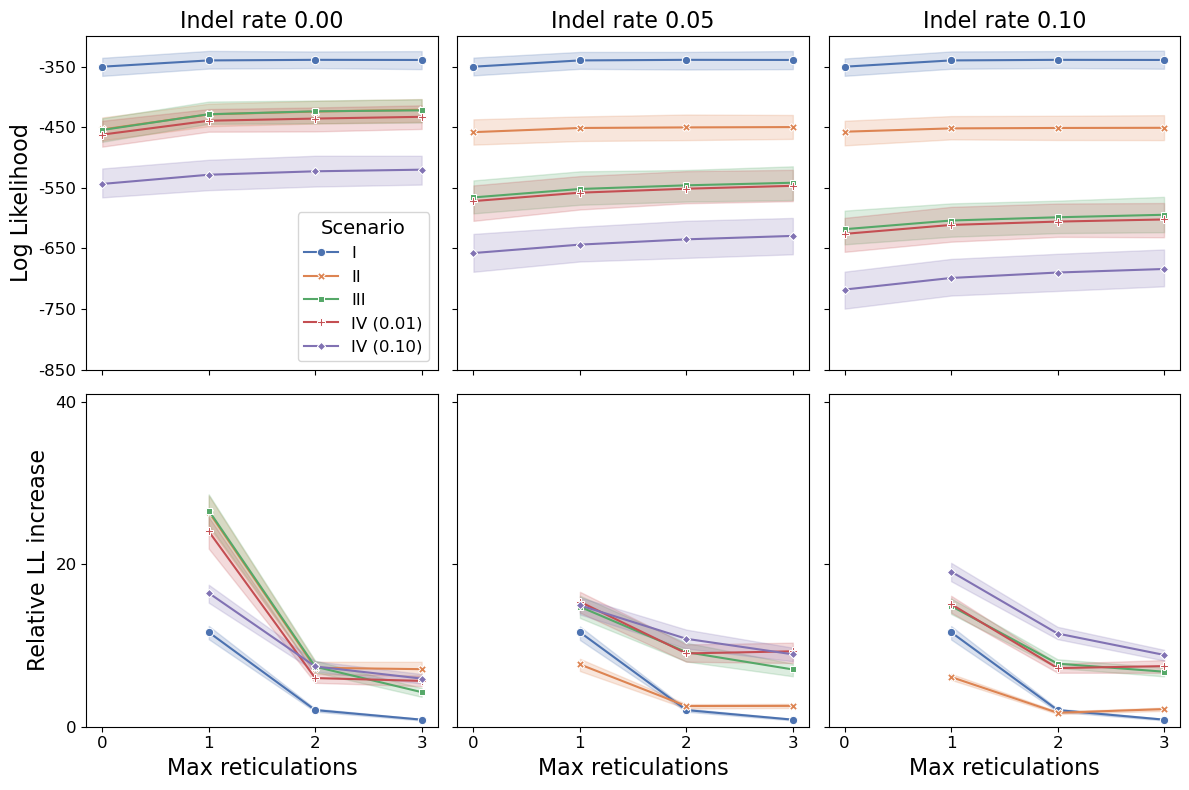

In [126]:
base_net = "s0_0_ret"
method = "InferNetwork_ML"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
_plot_df["log_likelihood"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[").max())
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])
_plot_df

_plot_diff_df = _plot_df[["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation", "log_likelihood"]]\
    .groupby(["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation"]).sum().diff()\
    .where(lambda x: x>0).dropna().reset_index().copy()
_plot_diff_df = _plot_diff_df[_plot_diff_df.max_reticulation!="0"].copy()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[0][i], legend=plot_legend)
        
for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_diff_df[_plot_diff_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_diff_df[(_plot_diff_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[1][i], legend=False)

axs[0][0].set_ylabel("Log Likelihood", fontsize=16)
axs[0][0].set_ylim((-850, -300))
axs[0][0].set_yticks(np.arange(-850, -300, 100))
axs[0][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-850, -300, 100)], fontsize=12)

axs[0][0].set_xticks([0, 1, 2, 3])
axs[0][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][1].set_xticks([0, 1, 2, 3])
axs[0][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][2].set_xticks([0, 1, 2, 3])
axs[0][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0][0].set_xlabel("Max reticulations", fontsize=16)
axs[0][1].set_xlabel("Max reticulations", fontsize=16)
axs[0][2].set_xlabel("Max reticulations", fontsize=16)

axs[0][0].set_title("Indel rate 0.00", fontsize=16)
axs[0][1].set_title("Indel rate 0.05", fontsize=16)
axs[0][2].set_title("Indel rate 0.10", fontsize=16)

axs[1][0].set_ylabel("Relative LL increase", fontsize=16)
axs[1][0].set_ylim((0, 41))
axs[1][0].set_yticks(np.arange(0, 41, 20))
axs[1][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 41, 20)], fontsize=12)

axs[1][0].set_xticks([0, 1, 2, 3])
axs[1][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][1].set_xticks([0, 1, 2, 3])
axs[1][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][2].set_xticks([0, 1, 2, 3])
axs[1][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[1][0].set_xlabel("Max reticulations", fontsize=16)
axs[1][1].set_xlabel("Max reticulations", fontsize=16)
axs[1][2].set_xlabel("Max reticulations", fontsize=16)

axs[1][0].set_title("", fontsize=16)
axs[1][1].set_title("", fontsize=16)
axs[1][2].set_title("", fontsize=16)

axs[0][0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/0ret-likelihoods-lli-change-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

## Pseudolikelihood trajectories

### Combined plots [2 reticulations]

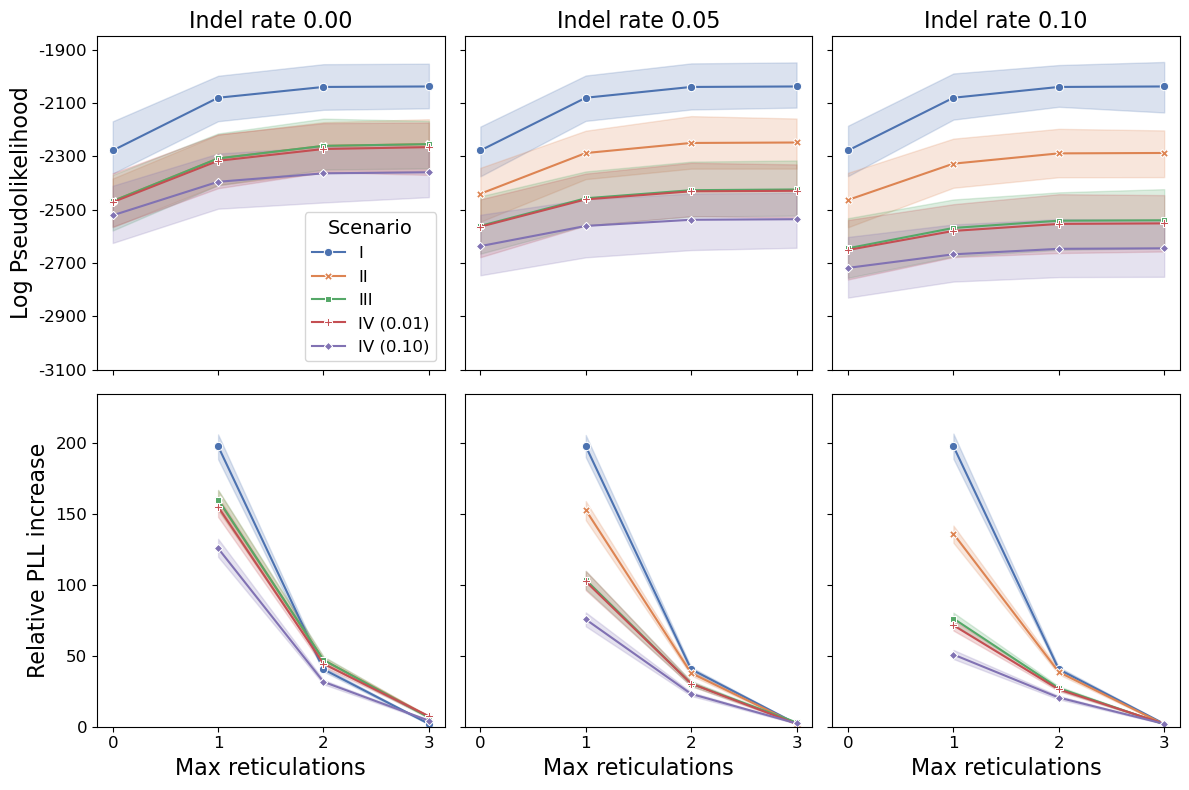

In [176]:
base_net = "s4_2_ret_cross"
method = "InferNetwork_MPL"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
_plot_df["log_likelihood"] = _plot_df["log_probability"]
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])

_plot_diff_df = _plot_df[["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation", "log_likelihood"]]\
    .groupby(["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation"]).sum().diff()\
    .where(lambda x: x>0).dropna().reset_index().copy()
_plot_diff_df = _plot_diff_df[_plot_diff_df.max_reticulation!="0"].copy()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[0][i], legend=plot_legend)
        
for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_diff_df[_plot_diff_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_diff_df[(_plot_diff_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[1][i], legend=False)

axs[0][0].set_ylabel("Log Pseudolikelihood", fontsize=16)
axs[0][0].set_ylim((-3100, -1850))
axs[0][0].set_yticks(np.arange(-3100, -1850, 200))
axs[0][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-3100, -1850, 200)], fontsize=12)

axs[0][0].set_xticks([0, 1, 2, 3])
axs[0][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][1].set_xticks([0, 1, 2, 3])
axs[0][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][2].set_xticks([0, 1, 2, 3])
axs[0][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0][0].set_xlabel("Max reticulations", fontsize=16)
axs[0][1].set_xlabel("Max reticulations", fontsize=16)
axs[0][2].set_xlabel("Max reticulations", fontsize=16)

axs[0][0].set_title("Indel rate 0.00", fontsize=16)
axs[0][1].set_title("Indel rate 0.05", fontsize=16)
axs[0][2].set_title("Indel rate 0.10", fontsize=16)

axs[1][0].set_ylabel("Relative PLL increase", fontsize=16)
axs[1][0].set_ylim((0, 235))
axs[1][0].set_yticks(np.arange(0, 235, 50))
axs[1][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 235, 50)], fontsize=12)

axs[1][0].set_xticks([0, 1, 2, 3])
axs[1][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][1].set_xticks([0, 1, 2, 3])
axs[1][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][2].set_xticks([0, 1, 2, 3])
axs[1][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[1][0].set_xlabel("Max reticulations", fontsize=16)
axs[1][1].set_xlabel("Max reticulations", fontsize=16)
axs[1][2].set_xlabel("Max reticulations", fontsize=16)

axs[1][0].set_title("", fontsize=16)
axs[1][1].set_title("", fontsize=16)
axs[1][2].set_title("", fontsize=16)

axs[0][0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/2ret-pseudolikelihoods-plli-change-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

### Combined plots [1 reticulation]

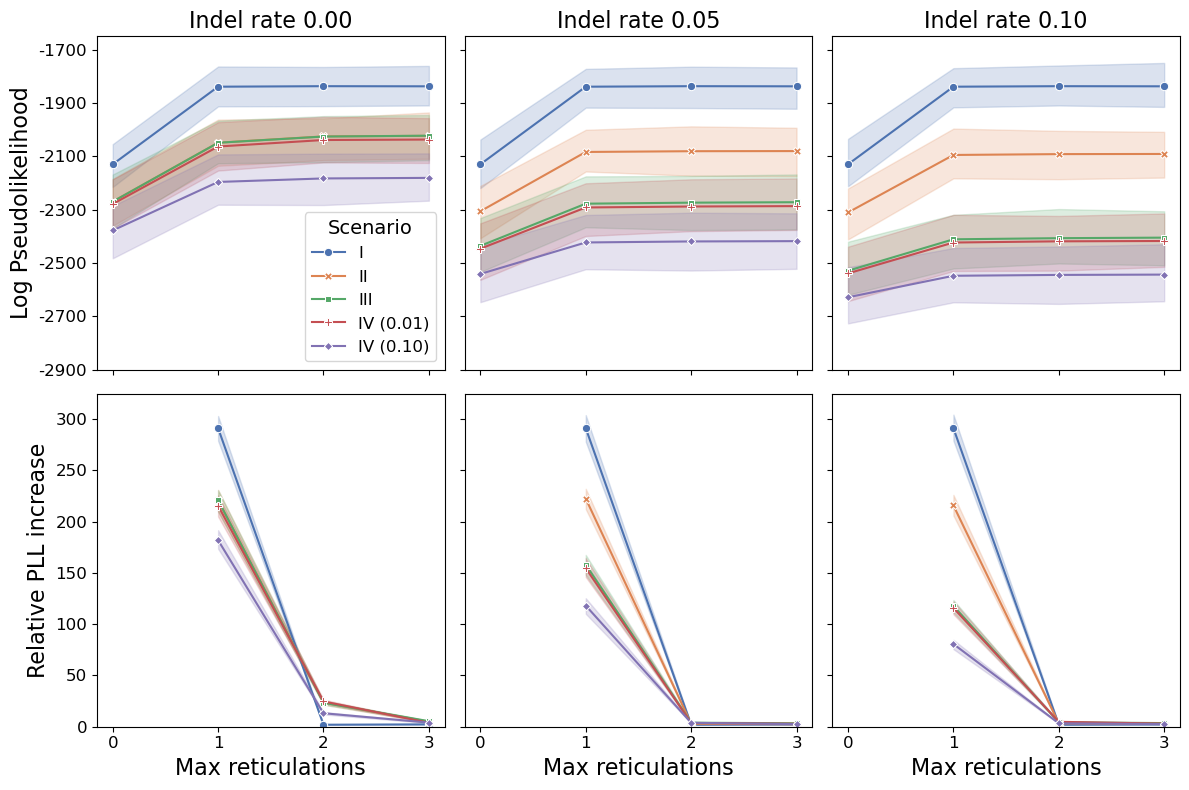

In [177]:
base_net = "s1_1_ret_down"
method = "InferNetwork_MPL"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
_plot_df["log_likelihood"] = _plot_df["log_probability"]
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])

_plot_diff_df = _plot_df[["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation", "log_likelihood"]]\
    .groupby(["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation"]).sum().diff()\
    .where(lambda x: x>0).dropna().reset_index().copy()
_plot_diff_df = _plot_diff_df[_plot_diff_df.max_reticulation!="0"].copy()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[0][i], legend=plot_legend)
        
for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_diff_df[_plot_diff_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_diff_df[(_plot_diff_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[1][i], legend=False)

axs[0][0].set_ylabel("Log Pseudolikelihood", fontsize=16)
axs[0][0].set_ylim((-2900, -1650))
axs[0][0].set_yticks(np.arange(-2900, -1650, 200))
axs[0][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-2900, -1650, 200)], fontsize=12)

axs[0][0].set_xticks([0, 1, 2, 3])
axs[0][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][1].set_xticks([0, 1, 2, 3])
axs[0][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][2].set_xticks([0, 1, 2, 3])
axs[0][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0][0].set_xlabel("Max reticulations", fontsize=16)
axs[0][1].set_xlabel("Max reticulations", fontsize=16)
axs[0][2].set_xlabel("Max reticulations", fontsize=16)

axs[0][0].set_title("Indel rate 0.00", fontsize=16)
axs[0][1].set_title("Indel rate 0.05", fontsize=16)
axs[0][2].set_title("Indel rate 0.10", fontsize=16)

axs[1][0].set_ylabel("Relative PLL increase", fontsize=16)
axs[1][0].set_ylim((0, 325))
axs[1][0].set_yticks(np.arange(0, 325, 50))
axs[1][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 325, 50)], fontsize=12)

axs[1][0].set_xticks([0, 1, 2, 3])
axs[1][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][1].set_xticks([0, 1, 2, 3])
axs[1][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][2].set_xticks([0, 1, 2, 3])
axs[1][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[1][0].set_xlabel("Max reticulations", fontsize=16)
axs[1][1].set_xlabel("Max reticulations", fontsize=16)
axs[1][2].set_xlabel("Max reticulations", fontsize=16)

axs[1][0].set_title("", fontsize=16)
axs[1][1].set_title("", fontsize=16)
axs[1][2].set_title("", fontsize=16)

axs[0][0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/1ret-pseudolikelihoods-plli-change-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

### Combined plots [0 reticulations]

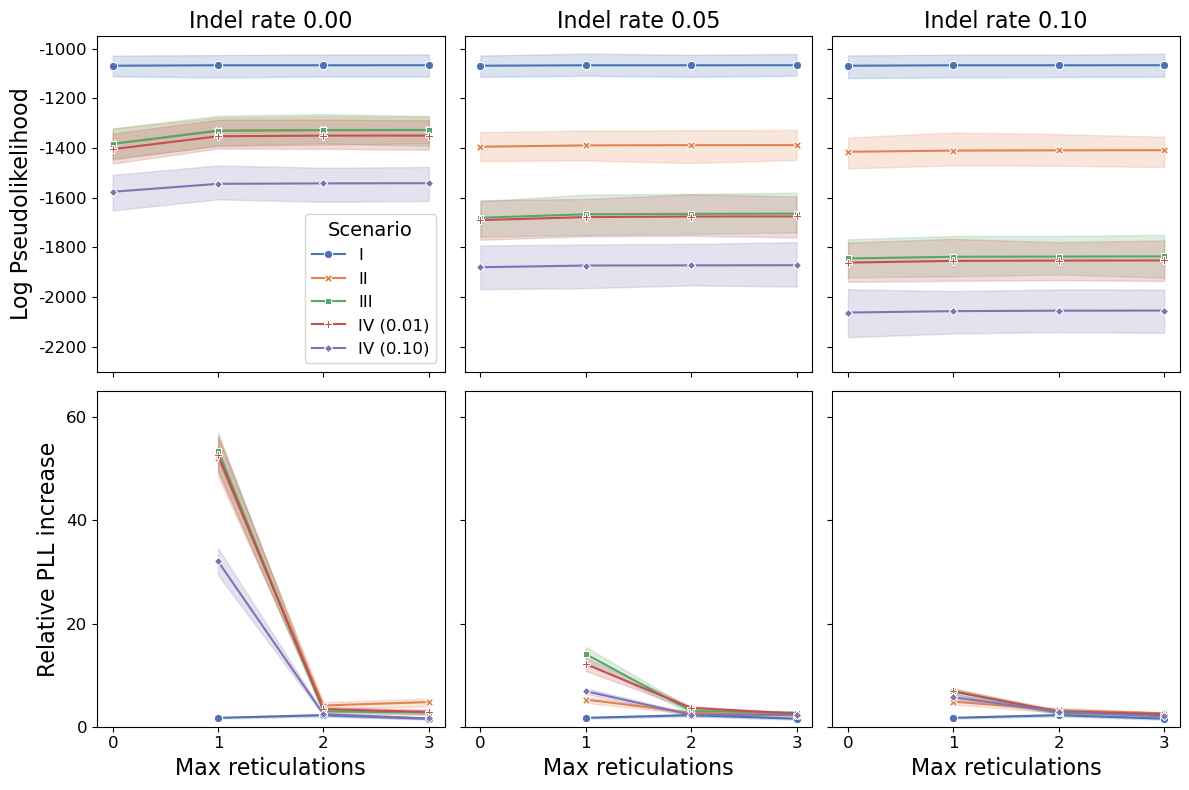

In [178]:
base_net = "s0_0_ret"
method = "InferNetwork_MPL"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
_plot_df["log_likelihood"] = _plot_df["log_probability"]
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])

_plot_diff_df = _plot_df[["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation", "log_likelihood"]]\
    .groupby(["scenario", "method", "alignment_length", "num_gt", "indel_rate", "error_rate", "replica", "max_reticulation"]).sum().diff()\
    .where(lambda x: x>0).dropna().reset_index().copy()
_plot_diff_df = _plot_diff_df[_plot_diff_df.max_reticulation!="0"].copy()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[0][i], legend=plot_legend)
        
for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_diff_df[_plot_diff_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_diff_df[(_plot_diff_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[1][i], legend=False)

axs[0][0].set_ylabel("Log Pseudolikelihood", fontsize=16)
axs[0][0].set_ylim((-2300, -950))
axs[0][0].set_yticks(np.arange(-2200, -950, 200))
axs[0][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-2200, -950, 200)], fontsize=12)

axs[0][0].set_xticks([0, 1, 2, 3])
axs[0][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][1].set_xticks([0, 1, 2, 3])
axs[0][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[0][2].set_xticks([0, 1, 2, 3])
axs[0][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0][0].set_xlabel("Max reticulations", fontsize=16)
axs[0][1].set_xlabel("Max reticulations", fontsize=16)
axs[0][2].set_xlabel("Max reticulations", fontsize=16)

axs[0][0].set_title("Indel rate 0.00", fontsize=16)
axs[0][1].set_title("Indel rate 0.05", fontsize=16)
axs[0][2].set_title("Indel rate 0.10", fontsize=16)

axs[1][0].set_ylabel("Relative PLL increase", fontsize=16)
axs[1][0].set_ylim((0, 65))
axs[1][0].set_yticks(np.arange(0, 65, 20))
axs[1][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 65, 20)], fontsize=12)

axs[1][0].set_xticks([0, 1, 2, 3])
axs[1][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][1].set_xticks([0, 1, 2, 3])
axs[1][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1][2].set_xticks([0, 1, 2, 3])
axs[1][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[1][0].set_xlabel("Max reticulations", fontsize=16)
axs[1][1].set_xlabel("Max reticulations", fontsize=16)
axs[1][2].set_xlabel("Max reticulations", fontsize=16)

axs[1][0].set_title("", fontsize=16)
axs[1][1].set_title("", fontsize=16)
axs[1][2].set_title("", fontsize=16)

axs[0][0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/0ret-pseudolikelihoods-plli-change-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

## MCMC distributions

### 2 reticulations

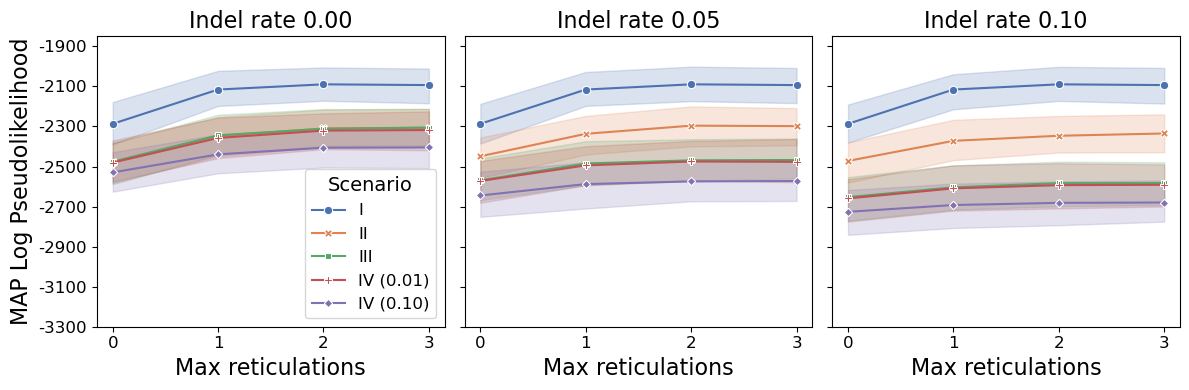

In [85]:
base_net = "s4_2_ret_cross"
method = "MCMC_GT_pseudo"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
# _plot_df["log_likelihoods"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[")[100:].mean())
_plot_df["log_likelihoods"] = _plot_df["log_probability"]
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihoods", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[i], legend=plot_legend)
        
axs[0].set_ylabel("MAP Log Pseudolikelihood", fontsize=16)
axs[0].set_ylim((-3300, -1850))
axs[0].set_yticks(np.arange(-3300, -1850, 200))
axs[0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-3300, -1850, 200)], fontsize=12)

axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0].set_xlabel("Max reticulations", fontsize=16)
axs[1].set_xlabel("Max reticulations", fontsize=16)
axs[2].set_xlabel("Max reticulations", fontsize=16)

axs[0].set_title("Indel rate 0.00", fontsize=16)
axs[1].set_title("Indel rate 0.05", fontsize=16)
axs[2].set_title("Indel rate 0.10", fontsize=16)

axs[0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/2ret-mcmc-pl-MAP-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

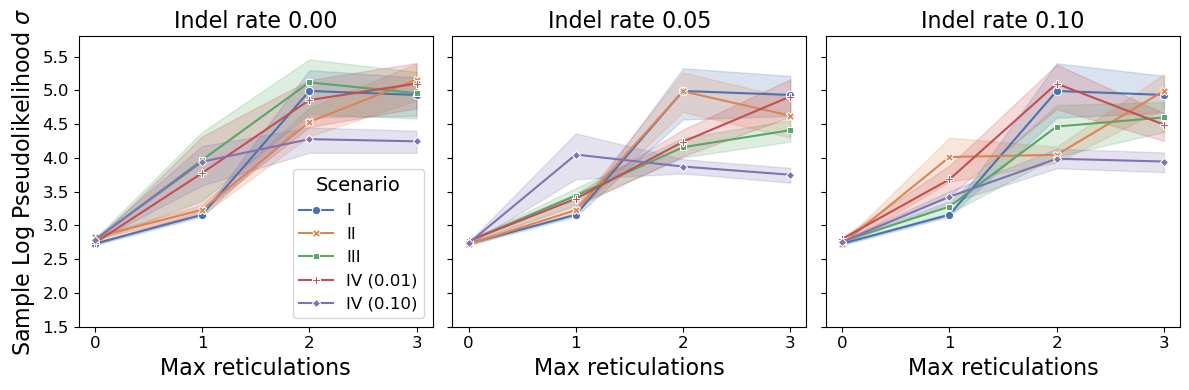

In [86]:
base_net = "s4_2_ret_cross"
method = "MCMC_GT_pseudo"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
# _plot_df["log_likelihoods"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[")[100:].mean())
_plot_df["log_likelihood_std"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[")[100:].std())
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood_std", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[i], legend=plot_legend)
        
axs[0].set_ylabel(r"Sample Log Pseudolikelihood $\sigma$", fontsize=16)
axs[0].set_ylim((1.5, 5.8))
axs[0].set_yticks(np.arange(1.5, 5.8, 0.5))
axs[0].set_yticklabels([f"{i:0.1f}" for i in np.arange(1.5, 5.8, 0.5)], fontsize=12)

axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0].set_xlabel("Max reticulations", fontsize=16)
axs[1].set_xlabel("Max reticulations", fontsize=16)
axs[2].set_xlabel("Max reticulations", fontsize=16)

axs[0].set_title("Indel rate 0.00", fontsize=16)
axs[1].set_title("Indel rate 0.05", fontsize=16)
axs[2].set_title("Indel rate 0.10", fontsize=16)

axs[0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/2ret-mcmc-pl-sample-std-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

### 1 reticulation

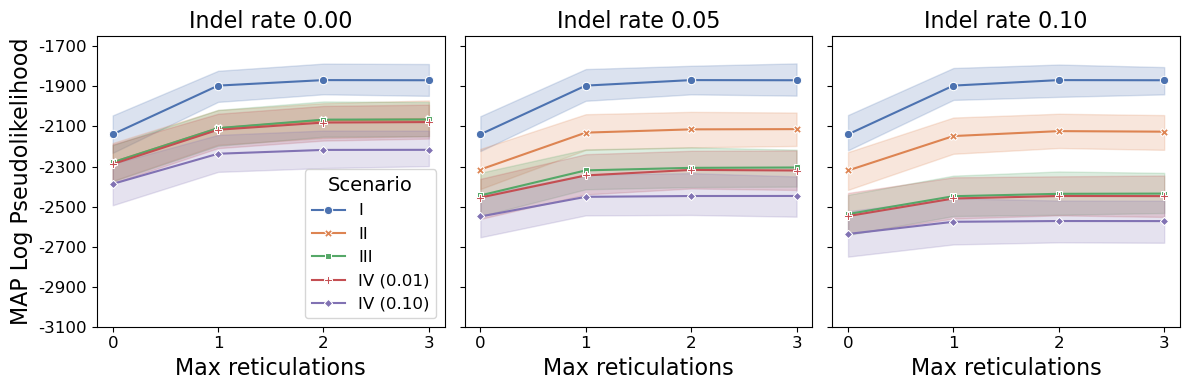

In [87]:
base_net = "s1_1_ret_down"
method = "MCMC_GT_pseudo"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
# _plot_df["log_likelihoods"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[")[100:].mean())
_plot_df["log_likelihoods"] = _plot_df["log_probability"]
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihoods", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[i], legend=plot_legend)
        
axs[0].set_ylabel("MAP Log Pseudolikelihood", fontsize=16)
axs[0].set_ylim((-3100, -1650))
axs[0].set_yticks(np.arange(-3100, -1650, 200))
axs[0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-3100, -1650, 200)], fontsize=12)

axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0].set_xlabel("Max reticulations", fontsize=16)
axs[1].set_xlabel("Max reticulations", fontsize=16)
axs[2].set_xlabel("Max reticulations", fontsize=16)

axs[0].set_title("Indel rate 0.00", fontsize=16)
axs[1].set_title("Indel rate 0.05", fontsize=16)
axs[2].set_title("Indel rate 0.10", fontsize=16)

axs[0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/1ret-mcmc-pl-MAP-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

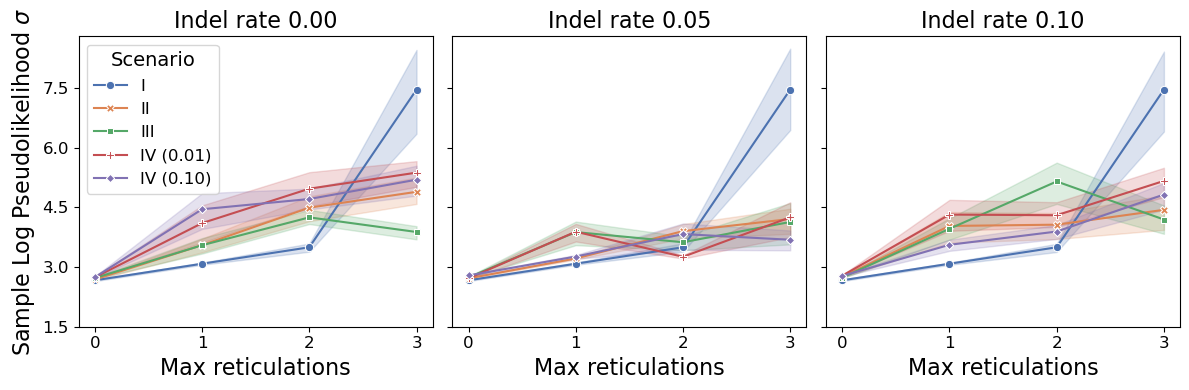

In [88]:
base_net = "s1_1_ret_down"
method = "MCMC_GT_pseudo"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
# _plot_df["log_likelihoods"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[")[100:].mean())
_plot_df["log_likelihood_std"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[")[100:].std())
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood_std", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[i], legend=plot_legend)
        
axs[0].set_ylabel(r"Sample Log Pseudolikelihood $\sigma$", fontsize=16)
axs[0].set_ylim((1.5, 8.8))
axs[0].set_yticks(np.arange(1.5, 8.8, 1.5))
axs[0].set_yticklabels([f"{i:0.1f}" for i in np.arange(1.5, 8.8, 1.5)], fontsize=12)

axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0].set_xlabel("Max reticulations", fontsize=16)
axs[1].set_xlabel("Max reticulations", fontsize=16)
axs[2].set_xlabel("Max reticulations", fontsize=16)

axs[0].set_title("Indel rate 0.00", fontsize=16)
axs[1].set_title("Indel rate 0.05", fontsize=16)
axs[2].set_title("Indel rate 0.10", fontsize=16)

axs[0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="upper left")

plt.tight_layout()
plt.savefig("../plots/1ret-mcmc-pl-sample-std-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

### 0 reticulations

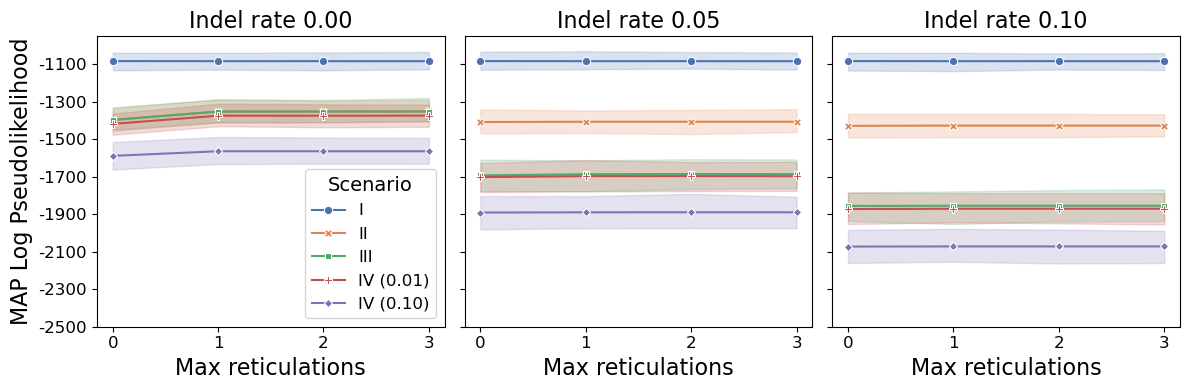

In [89]:
base_net = "s0_0_ret"
method = "MCMC_GT_pseudo"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
# _plot_df["log_likelihoods"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[")[100:].mean())
_plot_df["log_likelihoods"] = _plot_df["log_probability"]
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihoods", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[i], legend=plot_legend)
        
axs[0].set_ylabel("MAP Log Pseudolikelihood", fontsize=16)
axs[0].set_ylim((-2500, -950))
axs[0].set_yticks(np.arange(-2500, -950, 200))
axs[0].set_yticklabels([f"{i:0.0f}" for i in np.arange(-2500, -950, 200)], fontsize=12)

axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0].set_xlabel("Max reticulations", fontsize=16)
axs[1].set_xlabel("Max reticulations", fontsize=16)
axs[2].set_xlabel("Max reticulations", fontsize=16)

axs[0].set_title("Indel rate 0.00", fontsize=16)
axs[1].set_title("Indel rate 0.05", fontsize=16)
axs[2].set_title("Indel rate 0.10", fontsize=16)

axs[0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="lower right")

plt.tight_layout()
plt.savefig("../plots/0ret-mcmc-pl-MAP-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

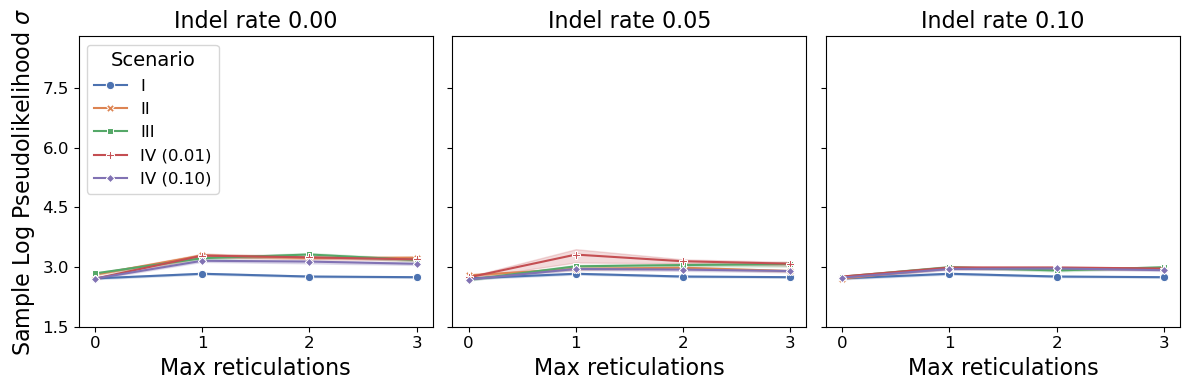

In [90]:
base_net = "s0_0_ret"
method = "MCMC_GT_pseudo"

_plot_df = data_df[(data_df.scenario==base_net)&(data_df.method==method)].copy()
# _plot_df["log_likelihoods"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[")[100:].mean())
_plot_df["log_likelihood_std"] = _plot_df["likelihoods"].apply(lambda x: np.fromstring(x[1:-1], sep="];[")[100:].std())
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                            lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                        )
_plot_df = _plot_df.dropna(subset=["scenario"])

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey='row', sharex=True)

indel_rates = ["0.0", "0.05", "0.1"]

for i, indel_rate in enumerate(indel_rates):
    _plot_df_i = _plot_df[_plot_df.indel_rate==indel_rate]
    plot_legend = True
    if i > 0:
        _plot_df_i = pd.concat([_plot_df[(_plot_df.scenario=="I")], _plot_df_i], axis=0)
        plot_legend = False
    sns.lineplot(data=_plot_df_i,
                    x="max_reticulation", y="log_likelihood_std", style="scenario", hue="scenario",
                    errorbar=("ci", 50), err_style="band",
                    markers=True, dashes=False, palette="deep",
                    ax=axs[i], legend=plot_legend)
        
axs[0].set_ylabel(r"Sample Log Pseudolikelihood $\sigma$", fontsize=16)
axs[0].set_ylim((1.5, 8.8))
axs[0].set_yticks(np.arange(1.5, 8.8, 1.5))
axs[0].set_yticklabels([f"{i:0.1f}" for i in np.arange(1.5, 8.8, 1.5)], fontsize=12)

axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[0].set_xlabel("Max reticulations", fontsize=16)
axs[1].set_xlabel("Max reticulations", fontsize=16)
axs[2].set_xlabel("Max reticulations", fontsize=16)

axs[0].set_title("Indel rate 0.00", fontsize=16)
axs[1].set_title("Indel rate 0.05", fontsize=16)
axs[2].set_title("Indel rate 0.10", fontsize=16)

axs[0].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="upper left")

plt.tight_layout()
plt.savefig("../plots/0ret-mcmc-pl-sample-std-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

## Topological accuracy

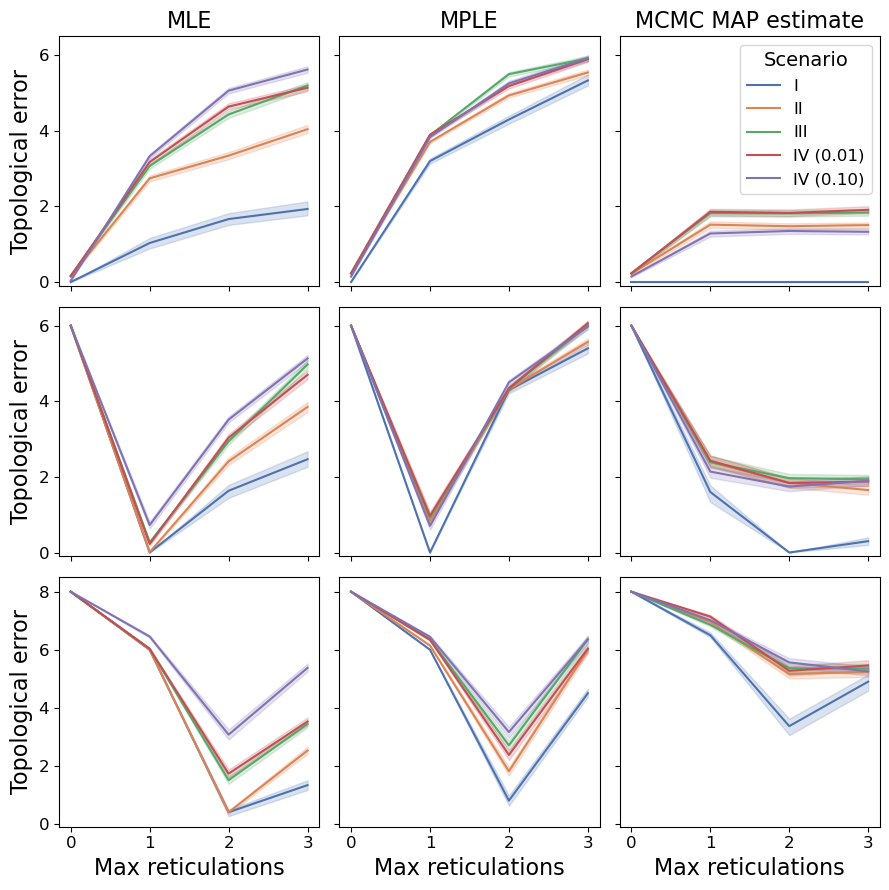

In [9]:
_plot_df = data_df[["scenario", "method", "max_reticulation", 
                    "num_gt", "alignment_length", "error_rate", "indel_rate", 
                    "mafft", "iqtree", "replica", "distance_RF", "distance_luay"]].copy()
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["inf_scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                                lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                            )
_plot_df = _plot_df.dropna(subset=["inf_scenario"])
_plot_df["topo_error"] = _plot_df[["distance_RF", "distance_luay"]].apply(lambda x: x["distance_luay"] if not np.isnan(x["distance_luay"]) else x["distance_RF"], axis=1)
_plot_df

fig, axs = plt.subplots(3, 3, figsize=(9, 9), sharey='row', sharex=True)

scenarios = ['s0_0_ret', 's1_1_ret_down', 's4_2_ret_cross']
methods = ['InferNetwork_ML', 'InferNetwork_MPL', 'MCMC_GT_pseudo']
for i, scenario in enumerate(scenarios):
    for j, method in enumerate(methods):
        plot_legend = False
        if i == 0 and j == 2:
            plot_legend = True
        sns.lineplot(data=_plot_df[(_plot_df.scenario==scenario)&(_plot_df.method==method)], x="max_reticulation", y="topo_error", 
                     hue="inf_scenario", 
                     palette="deep", hue_order=["I", "II", "III", "IV (0.01)", "IV (0.10)"], 
                     err_style="band", errorbar=("ci", 50),
                     ax=axs[i][j], legend=plot_legend)


axs[0][0].set_title("MLE", fontsize=16)
axs[0][1].set_title("MPLE", fontsize=16)
axs[0][2].set_title("MCMC MAP estimate", fontsize=16)

axs[0][0].set_ylim((-0.1, 6.5))
axs[0][0].set_yticks(np.arange(0, 6.5, 2))
axs[0][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 6.5, 2)], fontsize=12)

axs[1][0].set_ylim((-0.1, 6.5))
axs[1][0].set_yticks(np.arange(0, 6.5, 2))
axs[1][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 6.5, 2)], fontsize=12)

axs[2][0].set_ylim((-0.1, 8.5))
axs[2][0].set_yticks(np.arange(0, 8.5, 2))
axs[2][0].set_yticklabels([f"{i:0.0f}" for i in np.arange(0, 8.5, 2)], fontsize=12)

axs[0][0].set_ylabel("Topological error", fontsize=16)
axs[1][0].set_ylabel("Topological error", fontsize=16)
axs[2][0].set_ylabel("Topological error", fontsize=16)

axs[2][0].set_xticks([0, 1, 2, 3])
axs[2][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2][1].set_xticks([0, 1, 2, 3])
axs[2][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2][2].set_xticks([0, 1, 2, 3])
axs[2][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[2][0].set_xlabel("Max reticulations", fontsize=16)
axs[2][1].set_xlabel("Max reticulations", fontsize=16)
axs[2][2].set_xlabel("Max reticulations", fontsize=16)

axs[0][2].legend(title="Scenario", fontsize=12, title_fontsize=14, loc="upper right")

plt.tight_layout()
plt.savefig("../plots/topo-error-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

In [56]:
_plot_df = data_df[["scenario", "method", "max_reticulation", 
                    "num_gt", "alignment_length", "error_rate", "indel_rate", 
                    "mafft", "iqtree", "replica", "distance_RF", "distance_luay"]].copy()
_plot_df["has_error"] = _plot_df["error_rate"].apply(lambda x: True if x>0 else False)
_plot_df["max_reticulation"] = _plot_df["max_reticulation"].astype(str)
_plot_df["error_rate"] = _plot_df["error_rate"].astype(str)
_plot_df["indel_rate"] = _plot_df["indel_rate"].astype(str)
_plot_df["inf_scenario"] = _plot_df[["mafft", "iqtree", "has_error", "error_rate"]].apply(
                                lambda x: get_scenario(x["mafft"], x["iqtree"], x["has_error"], x["error_rate"]), axis=1
                            )
_plot_df = _plot_df.dropna(subset=["inf_scenario"])
_plot_df["topo_error"] = _plot_df[["distance_RF", "distance_luay"]].apply(lambda x: x["distance_luay"] if not np.isnan(x["distance_luay"]) else x["distance_RF"], axis=1)

_table_df = _plot_df[["scenario", "method", "max_reticulation", 
                      "num_gt", "alignment_length", "indel_rate", 
                      "inf_scenario", "topo_error"]].groupby(
                     ["scenario", "method", "max_reticulation", 
                      "num_gt", "alignment_length", "indel_rate", 
                      "inf_scenario"]).apply(lambda x: np.count_nonzero(x["topo_error"]) / len(x), include_groups=False).reset_index().copy()
_table_df["topo_accuracy"] = 1. - _table_df[[0]]

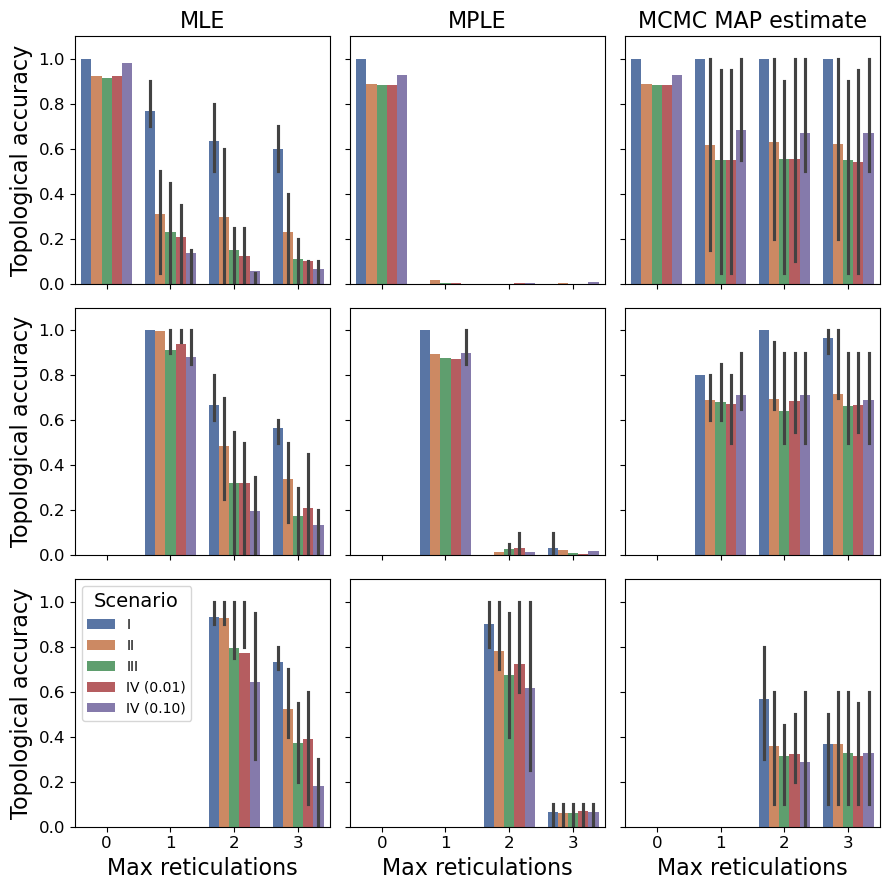

In [92]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9), sharey='row', sharex=True)

scenarios = ['s0_0_ret', 's1_1_ret_down', 's4_2_ret_cross']
methods = ['InferNetwork_ML', 'InferNetwork_MPL', 'MCMC_GT_pseudo']
for i, scenario in enumerate(scenarios):
    for j, method in enumerate(methods):
        plot_legend = False
        if i == 2 and j == 0:
            plot_legend = True
        sns.barplot(data=_table_df[(_table_df.scenario==scenario)&(_table_df.method==method)&\
                                   (_table_df.max_reticulation.astype(int)>=i)], x="max_reticulation", y="topo_accuracy", 
                     hue="inf_scenario", 
                     palette="deep", hue_order=["I", "II", "III", "IV (0.01)", "IV (0.10)"], 
                     errorbar=("pi", 50),
                     ax=axs[i][j], legend=plot_legend)


axs[0][0].set_title("MLE", fontsize=16)
axs[0][1].set_title("MPLE", fontsize=16)
axs[0][2].set_title("MCMC MAP estimate", fontsize=16)

axs[0][0].set_ylim((0, 1.1))
axs[0][0].set_yticks(np.arange(0, 1.1, 0.2))
axs[0][0].set_yticklabels([f"{i:0.1f}" for i in np.arange(0, 1.1, 0.2)], fontsize=12)

axs[1][0].set_ylim((0, 1.1))
axs[1][0].set_yticks(np.arange(0, 1.1, 0.2))
axs[1][0].set_yticklabels([f"{i:0.1f}" for i in np.arange(0, 1.1, 0.2)], fontsize=12)

axs[2][0].set_ylim((0, 1.1))
axs[2][0].set_yticks(np.arange(0, 1.1, 0.2))
axs[2][0].set_yticklabels([f"{i:0.1f}" for i in np.arange(0, 1.1, 0.2)], fontsize=12)

axs[0][0].set_ylabel("Topological accuracy", fontsize=16)
axs[1][0].set_ylabel("Topological accuracy", fontsize=16)
axs[2][0].set_ylabel("Topological accuracy", fontsize=16)

axs[2][0].set_xticks([0, 1, 2, 3])
axs[2][0].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2][1].set_xticks([0, 1, 2, 3])
axs[2][1].set_xticklabels(["0", "1", "2", "3"], fontsize=12)
axs[2][2].set_xticks([0, 1, 2, 3])
axs[2][2].set_xticklabels(["0", "1", "2", "3"], fontsize=12)

axs[2][0].set_xlabel("Max reticulations", fontsize=16)
axs[2][1].set_xlabel("Max reticulations", fontsize=16)
axs[2][2].set_xlabel("Max reticulations", fontsize=16)

axs[2][0].legend(title="Scenario", fontsize=10, title_fontsize=14, loc="upper left")

plt.tight_layout()
plt.savefig("../plots/topo-accuracy-bar-dpi300.png", dpi=300, bbox_inches="tight")
plt.show()

## Computational costs

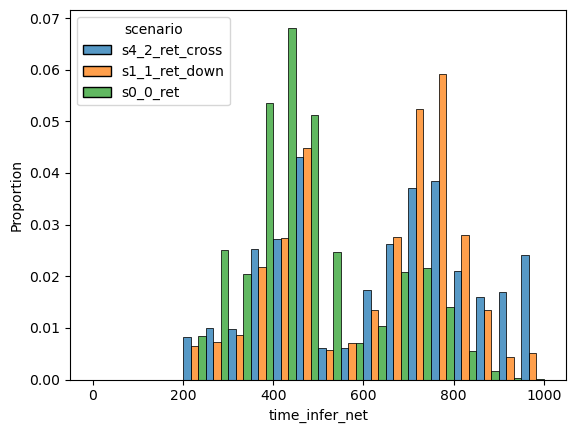

In [102]:
sns.histplot(data=data_df[data_df.method=="MCMC_GT_pseudo"], x="time_infer_net",
             stat="proportion", bins=20, hue="scenario", binrange=(0, 1000), multiple="dodge")

plt.show()

In [104]:
data_df[data_df.method=="InferNetwork_ML"].time_infer_net.describe()

count     20520.000000
mean        636.539991
std        3169.784213
min          12.570000
25%          77.147500
50%         145.690000
75%         371.957500
max      109691.710000
Name: time_infer_net, dtype: float64

In [105]:
data_df[data_df.method=="InferNetwork_MPL"].time_infer_net.describe()

count    20520.000000
mean       100.361263
std         81.054719
min         15.580000
25%         44.917500
50%         73.570000
75%        128.667500
max        814.420000
Name: time_infer_net, dtype: float64

In [103]:
data_df[data_df.method=="MCMC_GT_pseudo"].time_infer_net.describe()

count    20520.000000
mean       626.603134
std        246.544608
min        223.030000
25%        424.530000
50%        623.205000
75%        777.400000
max       2081.610000
Name: time_infer_net, dtype: float64